In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import euclidean_distances, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import pickle

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
data["ExerciseAngina"] = [0 if elem == "N" else 1 for elem in data["ExerciseAngina"]]
data["Sex"] = [0 if elem == "M" else 1 for elem in data["Sex"]]

In [7]:
data = pd.get_dummies(data)

In [8]:
data.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,0,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,1,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,0,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,0,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,1,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [9]:
data.shape

(918, 19)

In [10]:
X = data.drop('HeartDisease', axis=1).to_numpy()
y = data['HeartDisease'].to_numpy()

In [11]:
print(X.shape)
print(y.shape)

(918, 18)
(918,)


In [12]:
X = normalize(X, norm="max", axis=0)

Разбиваем на обучающую и тестовую выборки

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5, shuffle=True)

In [14]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (734, 18)
y_train shape:  (734,)
X_test shape:  (184, 18)
y_test shape:  (184,)


### Logistic Regression (логистическая регрессия)

In [15]:
class Linear():
    def __init__(self, num_in, num_out): # num_in - число входных сигналов, num_out - число сигналов на выходе
        self.W = np.random.normal(0, 1.0 / np.sqrt(num_in), (num_out, num_in)) # Нормальное распределение с центром в 0, и отклонением 1.0 / np.sqrt(num_in)
        self.b = np.zeros((1, num_out))                                        # Чтобы у всех сигналов были с одинаковыми характеристиками Сред = 0, Отклонение ~ 1
        self.dW = np.zeros((num_out, num_in))
        self.db = np.zeros((1, num_out))

    # Выполнение вычисления (z = x * w_T + b)
    def forward(self, x):
        self.x = x
        return np.dot(x, self.W.T) + self.b

    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx

    def update(self, learning_rate):
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

In [16]:
# Класс сети
class Network():
    def __init__(self, loss_function):
        self.layers = [] # Инициализация слоёв
        self.loss_function = loss_function()

    # Добавление слоя в сеть
    def add(self, layer):
        self.layers.append(layer)

    # Проход по всем слоям
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    # Обратный проход по всем слоям
    def backward(self, z):
        for layer in self.layers[::-1]:
            z = layer.backward(z)
        return z

    # Вычисление функции потерь
    def loss_forward(self, x, y):
        p = self.forward(x)
        return self.loss_function.forward(p, y)

    def loss_backward(self, l):
        dp = None
        dp = self.loss_function.backward(l)
        return self.backward(dp)
    
    # Обновление для всех слоёв, у которых есть 'update'
    def update(self, learning_rate):
        for layer in self.layers:
            if 'update' in layer.__dir__():
                layer.update(learning_rate)

    def train_epoch(self, x, y, batch_size=10, lr=0.001):
        for i in range(0, len(x), batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            loss = self.loss_forward(x_batch, y_batch)
            dx = self.loss_backward(loss)
            self.update(lr)

Функция потерь

In [17]:
# Функция потерь перекрёстной энтропии
class CrossEntropyLoss():
    def forward(self,p,y):
        self.p = p
        y = y.reshape((y.shape[0], 1))
        self.y = y
        result = y * np.log(p) + (1 - y) * np.log(1 - p)
        np.log
        return -np.mean(result)
    
    def backward(self,loss):
        result = (self.p - self.y) / (self.p * (1 - self.p))
        return result / self.p.shape[0]

Логистическая функция (сигмоида)

In [18]:
# Функция сигмоиды
class Sigmoid():
    def forward(self, x):
        self.y = 1.0 / (1 + np.exp(-x))
        return self.y

    def backward(self, dy):
        return (1.0 - self.y**2) * dy

Классификатор логистической регрессии

In [19]:
# Logistic regression
class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=1, batch_size=15, learning_rate=0.01):
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.Network = Network(CrossEntropyLoss)
        self.Network.add(Linear(num_in=18, num_out=1))
        self.Network.add(Sigmoid())
    
    def fit(self, X, y):
        # Проверяет X и y на одинаковую длину
        # Принудительно делает X двумерным, y - одномерным
        X, y = check_X_y(X, y)
        self.X = X
        self.y = y
        for epoch in range(self.epochs):
            self.Network.train_epoch(X, y, self.batch_size, self.learning_rate)
        return self

    def predict(self, X):
        check_is_fitted(self, ['X', 'y'])
        prediction = self.Network.forward(X)
        result = np.where(prediction < 0.5, 0, 1)
        return result
        

In [20]:
def learning_information(learning_model, X, y):
    y_prediction = learning_model.predict(X)
    print('Accuracy score: ', accuracy_score(y, y_prediction))
    print('Recall score: ', recall_score(y, y_prediction))
    print('Precision score: ', precision_score(y, y_prediction))
    print('ROC AUC score: ', roc_auc_score(y, y_prediction))

    print('Матрица ошибок: ')
    conf_matr = confusion_matrix(y, y_prediction)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matr)
    display.plot()
    plt.show()

    print('График ROC-кривой: ')
    display = RocCurveDisplay.from_predictions(y_true=y, y_pred=y_prediction, name="ROC-кривая")


In [21]:
log_regression = GridSearchCV(Pipeline([("Logistic_regression", LogisticRegression())]),
    {"Logistic_regression__epochs" : [1, 5, 10, 15, 20],
    "Logistic_regression__batch_size" : [5, 10, 15, 20, 25],
    "Logistic_regression__learning_rate" : [0.01, 0.05, 0.25, 0.5, 0.1]})

log_regression.fit(X_train, y_train)
log_regression_best = log_regression.best_estimator_
print('Лучший оценщик: ', log_regression_best)

Лучший оценщик:  Pipeline(steps=[('Logistic_regression',
                 LogisticRegression(epochs=15, learning_rate=0.05))])


Accuracy score:  0.907608695652174
Recall score:  0.9099099099099099
Precision score:  0.9351851851851852
ROC AUC score:  0.907009749475503
Матрица ошибок: 


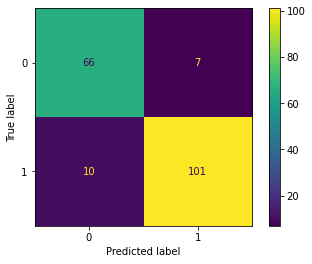

График ROC-кривой: 


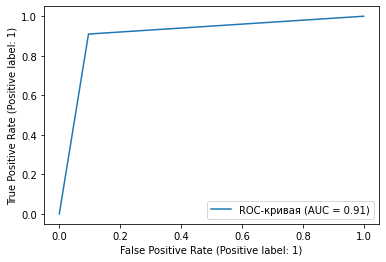

In [22]:
learning_information(log_regression_best, X_test, y_test)

#### Коробочное решение

In [42]:
skl_log_regression = GridSearchCV(Pipeline([('SKL_Logistic_regression', LogisticRegression())]),
    {'SKL_Logistic_regression__epochs' : [1, 5, 10, 15, 20],
    'SKL_Logistic_regression__batch_size' : [5, 10, 15, 20, 25],
    'SKL_Logistic_regression__learning_rate' : [0.01, 0.05, 0.25, 0.5, 0.1]})

skl_log_regression.fit(X_train, y_train)
skl_log_reg_best = skl_log_regression.best_estimator_
print('Лучший оценщик: ', skl_log_reg_best)

Лучший оценщик:  Pipeline(steps=[('SKL_Logistic_regression',
                 LogisticRegression(batch_size=25, epochs=20,
                                    learning_rate=0.05))])


Accuracy score:  0.9021739130434783
Recall score:  0.9009009009009009
Precision score:  0.9345794392523364
ROC AUC score:  0.9025052449709985
Матрица ошибок: 


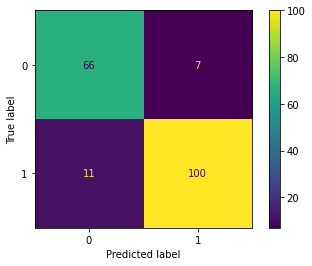

График ROC-кривой: 


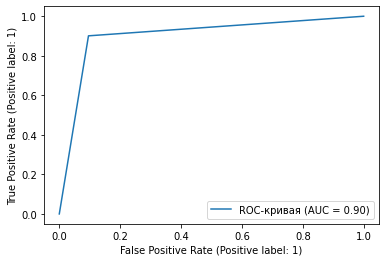

In [43]:
learning_information(skl_log_reg_best, X_test, y_test)

#### Сериализация

In [25]:
file = open('models/my_logistic_regression.pkl', 'wb')
pickle.dump(log_regression_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

### SVM (support vector machine)

In [26]:
class SVM(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=1, batch_size=15, lr=0.01, alpha=0.001):
        self.epochs = epochs
        self.batch_size = batch_size
        self.lr = lr
        self.alpha = alpha
    
    def fit(self, X, y):
        self.W = np.random.normal(0, 1, (X.shape[1]+1,))
        y = y * 2 - 1
        X = np.concatenate((X, np.ones((X.shape[0],1))), axis=1)
        for epoch in range(self.epochs):
            for i in range(self.batch_size, len(X), self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                gradient = 2 * self.alpha * self.W
                for i, x in enumerate(X_batch):
                    if 1 - x.dot(self.W) * y_batch[i] > 0:
                        gradient -= x * y_batch[i]
                self.W -= self.lr * gradient
        return self

    def predict(self, data):
        return (np.sign(np.concatenate((data, np.ones((data.shape[0],1))), axis=1).dot(self.W)) + 1) / 2

In [27]:
svm = GridSearchCV(Pipeline([("SVM", SVM())]),
    {'SVM__epochs' : [1, 5, 10, 15, 20],
    'SVM__batch_size' : [5, 10, 15, 20, 25],
    'SVM__lr' : [0.01, 0.05, 0.25, 0.5, 0.1],
    'SVM__alpha' : [0.1, 0.01, 0.001, 0.0001, 0.00001]})

svm.fit(X_train, y_train)
svm_best = svm.best_estimator_
print('Лучший оценщик: ', svm_best)

Лучший оценщик:  Pipeline(steps=[('SVM', SVM(alpha=0.01, batch_size=5, epochs=10))])


Accuracy score:  0.8967391304347826
Recall score:  0.8828828828828829
Precision score:  0.9423076923076923
ROC AUC score:  0.9003455510304825
Матрица ошибок: 


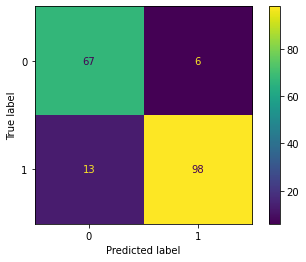

График ROC-кривой: 


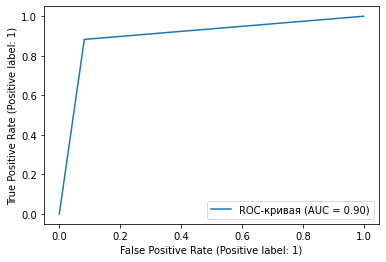

In [28]:
learning_information(svm_best, X_test, y_test)

#### Коробочное решение SVM

In [29]:
skl_svm = GridSearchCV(Pipeline([('SKL_SVC', SVC())]),
    {'SKL_SVC__kernel' : ['linear', 'poly']})

skl_svm.fit(X_train, y_train)
skl_svm_best = skl_svm.best_estimator_
print('Лучший оценщик: ', skl_svm_best)

Лучший оценщик:  Pipeline(steps=[('SKL_SVC', SVC(kernel='linear'))])


Accuracy score:  0.9130434782608695
Recall score:  0.9099099099099099
Precision score:  0.9439252336448598
ROC AUC score:  0.913859064543996
Матрица ошибок: 


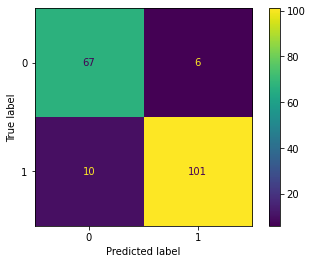

График ROC-кривой: 


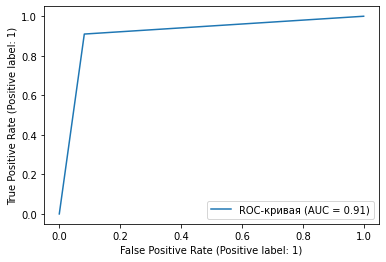

In [30]:
learning_information(skl_svm_best, X_test, y_test)

#### Сериализация

In [31]:
file = open('models/my_svm.pkl', 'wb')
pickle.dump(svm_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

### KNN

In [32]:
class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=1):
        self.k = k # Количество ближайших точек

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.X = X
        self.y = y
        return self

    def predict(self, X):
        # Проверяет, что ранее был вызван fit
        check_is_fitted(self, ['X', 'y'])
        predictions = np.ndarray((X.shape[0],))
        for (num, elem) in enumerate(X):
            distances = euclidean_distances([elem], self.X)[0]
            neighbors = np.argpartition(distances, kth=self.k-1) # Косвенное разбиение
            k_nearest_neighbors = neighbors[:self.k] # k ближайших соседей
            # Различные метки и количество для каждой метки
            labels, counts = np.unique(self.y[k_nearest_neighbors], return_counts=True)
            predictions[num] = labels[counts.argmax()] # Наиболее вероянтая метка
        return predictions

In [33]:
k_nearest_neighbours = GridSearchCV(Pipeline([('KNN', KNN())]),
    {'KNN__k' : [1, 3, 5, 7, 9, 11, 15, 20, 30]})
k_nearest_neighbours.fit(X_train, y_train)
k_nearest_neighbours_best = k_nearest_neighbours.best_estimator_
print('Лучший оценщик: ', k_nearest_neighbours_best)

Лучший оценщик:  Pipeline(steps=[('KNN', KNN(k=20))])


Accuracy score:  0.8695652173913043
Recall score:  0.8558558558558559
Precision score:  0.9223300970873787
ROC AUC score:  0.8731334073799828
Матрица ошибок: 


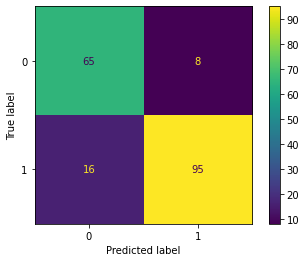

График ROC-кривой: 


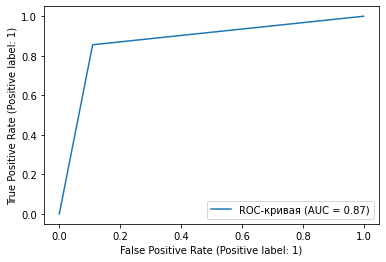

In [34]:
learning_information(k_nearest_neighbours_best, X_test, y_test)

#### Коробочное решение

In [35]:
skl_knn = GridSearchCV(Pipeline([('SKL_KNN', KNeighborsClassifier())]),
    {'SKL_KNN__n_neighbors' : [1, 3, 5, 7, 9, 11, 15, 20, 30]})

skl_knn.fit(X_train, y_train)
skl_knn_best = skl_knn.best_estimator_
print('Лучший оценщик: ', skl_knn_best)

Лучший оценщик:  Pipeline(steps=[('SKL_KNN', KNeighborsClassifier(n_neighbors=20))])


Accuracy score:  0.8695652173913043
Recall score:  0.8558558558558559
Precision score:  0.9223300970873787
ROC AUC score:  0.8731334073799828
Матрица ошибок: 


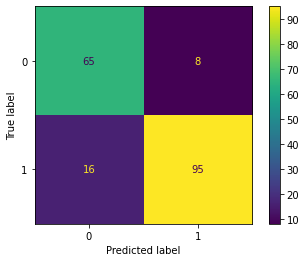

График ROC-кривой: 


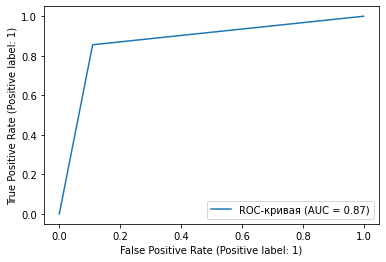

In [36]:
learning_information(skl_knn_best, X_test, y_test)

#### Сериализация

In [37]:
file = open('models/my_knn.pkl', 'wb')
pickle.dump(k_nearest_neighbours_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

### NaiveBayes

In [38]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    # Нормальное Гауссово распределение
    def normal_gauss(self, x, mu, sigma): # mu - математическое ожидание, sigma - стандартное отклонение
        # return (np.exp(-(x - mu)**2 / (2 * sigma**2))) / np.float32(sigma * np.sqrt(2 * np.pi))
        return (np.exp(-((x - mu) / sigma)**2 / 2)) / np.float32(sigma * np.sqrt(2 * np.pi))

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.X = X
        self.y = y
        # Различные метки и количество для каждой метки
        labels, counts = np.unique(self.y, return_counts=True)
        self.standard_deviations = np.array([self.X[self.y == label].std(axis=0) for label in labels])
        self.means = np.array([self.X[self.y == label].mean(axis=0) for label in labels])
        self.y_pred = np.array([count / self.y.shape[0] for count in counts])
        self.labels = labels
        return self
         
    def predict(self, X):
        check_is_fitted(self, ['X', 'y'])
        result = np.ndarray(X.shape[0])
        for (num_x, x) in enumerate(X):
            predictions = np.array(self.y_pred)
            for (num_label, label) in enumerate(self.labels):
                predictions[num_label] *= np.prod(np.array([self.normal_gauss(x[i], self.means[num_label][i], self.standard_deviations[num_label][i]) for i in range(X.shape[1])]))
            result[num_x] = np.argmax(predictions)
        return result


Accuracy score:  0.8858695652173914
Recall score:  0.8648648648648649
Precision score:  0.9411764705882353
ROC AUC score:  0.8913365420214736
Матрица ошибок: 


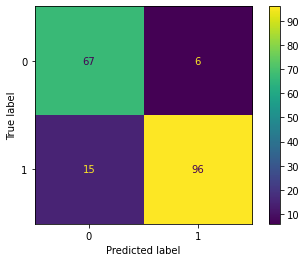

График ROC-кривой: 


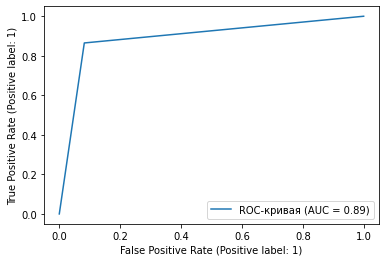

In [39]:
naive_bayes = Pipeline([("NB", NaiveBayes())])
naive_bayes.fit(X_train, y_train)
learning_information(naive_bayes, X_test, y_test)

#### Коробочное решение

Accuracy score:  0.8858695652173914
Recall score:  0.8648648648648649
Precision score:  0.9411764705882353
ROC AUC score:  0.8913365420214736
Матрица ошибок: 


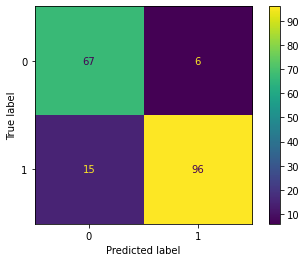

График ROC-кривой: 


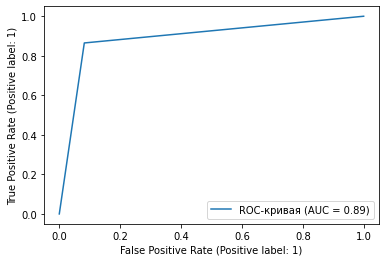

In [40]:
skl_naive_bayes = Pipeline([("SKL_Naive_Bayes", GaussianNB())])
skl_naive_bayes.fit(X_train, y_train)
learning_information(skl_naive_bayes, X_test, y_test)

#### Сериализация

In [41]:
file = open('models/my_naive_bayes.pkl', 'wb')
pickle.dump(naive_bayes, file, pickle.HIGHEST_PROTOCOL)
file.close()